# Vector Calculus and (Simple) Neural Networks

## Part 1: Vector Calculus Essentials
This section introduces gradient, divergence, curl, and Jacobian.
Objective: Calculate and visualise the gradient of the two-variable function $f(x, y) = x^2 + y^2$ using NumPy and Matplotlib.

Read the code and try to understand it. There is nothing to code in this part.

# GABRIEL SULTAN DIA - 6

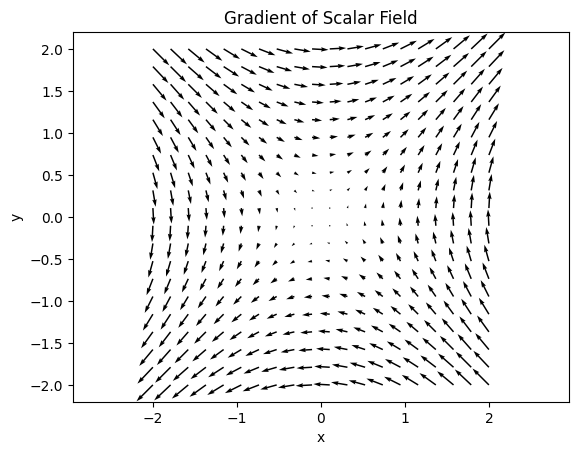

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient of a scalar field
def scalar_field(x, y):
    return x**2 + y**2

x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = scalar_field(X, Y)

# Compute gradient
dx, dy = np.gradient(Z, x, y)

plt.quiver(X, Y, dx, dy)
plt.title("Gradient of Scalar Field")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

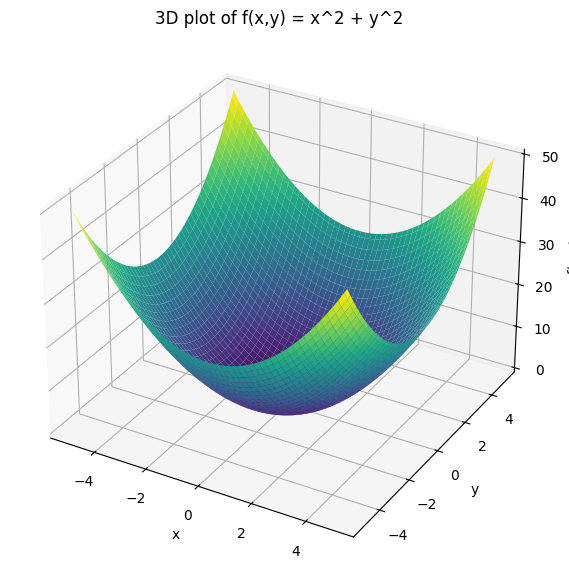

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return x**2 + y**2

#generate a meshgrid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.title("3D plot of f(x,y) = x^2 + y^2")
plt.show()

## Part 2: Implement a neural network from scratch
We will implement a simple neural network as show in the figure below:
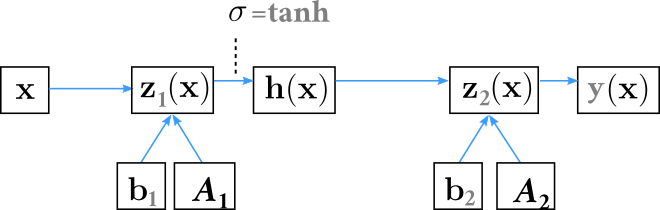

Now let's implement this neural network step by step

⚠️All the math formulars in this notebook use column vectors, meaning that a vector of $n$ elements is in dimension $\mathbb{R}^{n\times 1}$.
This is different from a default array in numpy. To keep the consistency with the lecture, need to convert a default array to its transpose. This is done in method `backward()`. Just keep this in mind if you find some dimension errors

⚠️

The architecture is defined as:
* Input layer: $\mathbf{x} \in \mathbb{R}^d$

with batch of $n$ samples, it bacomes
* Input: $\mathbf{x} \in \mathbb{R}^{n\times d}$
* Hidden layer:
    + Weights: $\mathbf{A}_1 \in \mathbb{R}^{h \times d}$

    + Biases: $\mathbf{b}_1 \in \mathbb{R}^{h\times 1}$

    + Pre-activation: $\mathbf{z}_1 = \mathbf{A}_1 \mathbf{x}^T + \mathbf{b}_1$

    + Activation: $\mathbf{h} = \tanh(\mathbf{z}_1)$
* Output layer:
    + Weights: $\mathbf{A}_2 \in \mathbb{R}^{m \times h}$

    + Biases: $\mathbf{b}_2 \in \mathbb{R}^{m\times 1}$

    + Pre-activation: $\mathbf{z}_2=\mathbf{A}_2 \mathbf{h} + \mathbf{b}_2$

    + Output: $\hat{\mathbf{y}} = \mathbf{z}_2^T \in \mathbb{R}^{n\times m}$ (to make the dimension adaptalbe to the input batch data $\mathbf{x}$.)




### Step 1: Define the meta-parameters and parameters of the neural network
Refer to Slide 32 in the lecture

#### Meta-parameters define the architecture of the network

`input_size` should adapt to the dimension of the input data $d$

`hidden_size` is the number of neurons in the hidden layer $h$

`output_size` should adapt to the number of possible classes in the classification missions $m$

#### Parameters consist of two weight matrix (A1, A2) and two bias vectors (b1, b2).
We initialize the weights with standard normal (`np.random.randn`)  and initialize the bias with 0 (`np.zeros`).

**Question**: What are the dimensions of `A1`, `A2`, `b1`, `b2`? You need to pass the dimension as parameters to these two initialisation methods.

In [38]:
# Network architecture

def initialize_parameters(input_size, hidden_size, output_size):
    # A1: (h, d), b1: (h, 1)
    # A2: (m, h), b2: (m, 1)
    A1 = np.random.randn(hidden_size, input_size)
    b1 = np.zeros((hidden_size, 1))
    A2 = np.random.randn(output_size, hidden_size)
    b2 = np.zeros((output_size, 1))
    return A1, b1, A2, b2


### Step 2: Complete the forward pass to calculate the output of each layer.

We defined `tanh()` as activation function, with the preimplemented function in `numpy`

In forward pass, the output of each layer should be calculated, these values will be used in the training process. Refer to Slide 31 for details

In [39]:
# Activation function
def tanh(x):
    return np.tanh(x)

def forward(X, A1, b1, A2, b2):
    # Complete the calculation of Z1 and Z2 (These two functions are denoted as Zh and Zo in the slide.)
    X = X.T  # Data in python is a row vector, we need to transpose it to adapt to our math formulation.
    z1 = np.dot(A1, X) + b1  # Zh = A1 * X + b1
    h1 = tanh(z1)            # activation for hidden layer
    z2 = np.dot(A2, h1) + b2 # Zo = A2 * h1 + b2
    y_pred = z2              # No activation at last layer (assume regression or linear output)
    return z1, h1, z2, y_pred

### Step 3: Complete the training process with back propagation.

Let's implement a simple training process with stochastic gradient desending method, with a predefined learning rate `lr`

During the training process, the loss should be recorded in each epoch loop.

During the back propagation process, the numerical gradient of each parameter with each current values should be calculated. Given a mean squared error loss function $$\mathcal{L}=\frac{1}{n}\|\hat{\mathbf{y}} - \mathbf{y}\|^2 = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2$$

* Define activation function tanh and its derivative with given value of vector function $\mathbf{z}$
$$tanh^\prime(\mathbf{z})=1-tanh^2(\mathbf{z})$$

In [40]:
# define activation function tanh and its derivative with given value of vector function z
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

* Define Mean Squared error (MSE) loss between observation $\mathbf{y}$ and model prediction $\hat{\mathbf{y}}$.
$$\mathcal{L}=MSE (\hat{\mathbf{y}}, \mathbf{y})=\frac{1}{n}\|\hat{\mathbf{y}} - \mathbf{y}\|^2 = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2$$
* Define the derivative of loss w.r.t output pre-activation $z_2$.
$$
\frac{\partial \mathcal{L}}{\partial{\mathbf{z}_2}}=\frac{2}{n}(\hat{\mathbf{y}}^T - \mathbf{y}^T)
$$


In [41]:
def mse_loss(y_pred, y_true):
    # Return the MSE between vector y_pred and y_true.
    return np.mean((y_pred - y_true) ** 2)

def mse_derivative(y_pred, y_true):
    # Return the derivative of mse loss.
    n = y_true.shape[-1] if y_true.ndim == 2 else y_true.size
    return 2 * (y_pred - y_true) / n



The gradient in a backward propagation is calculated as:


1. Gradient w.r.t. output layer weights $\mathbf{A}_2$, using varialbe `dA2`

$$\frac{\partial \mathcal{L}}{\partial \mathbf{A}_2} = \frac{\partial \mathcal{L}}{\partial{\mathbf{z}_2}} \cdot \mathbf{h}_1^\top$$


2. Gradient w.r.t. output layer biases $\mathbf{b}_2$, using variable `db2`

$$\frac{\partial \mathcal{L}}{\partial \mathbf{b}_2} = \sum_{i=1}^n\frac{\partial\mathcal{L}}{\partial\mathbf{z}_2}$$
(Why do we have a sum here? In the training process, we pass a batch of $n$ data samples. Therefore, the dimension of $\mathbf{z}_2$ is $n\times m$ rather than $1 \times m$. We can consider as "The gradient calculation is cumulated by $n$ training data samples". So we sum them up.
Similarly, in the calculation of $\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1}$, there is also a sum operation.
)

3. Gradient w.r.t. hidden Hidden Activation $h_1$​
 $$\frac{\partial \mathcal{L}}{​∂h_1}​=\mathbf{A}_2^T\cdot \frac{\partial \mathcal{L}}{\partial{\mathbf{z}_2}}​$$

4. Gradient w.r.t. hidden pre-activation $\mathbf{z}_1$

Since $h_1 = \tanh(z_1)$, we use:
$$
\frac{\partial\mathbf{h}_1}{\partial\mathbf{z}_1}=1-tanh^2(\mathbf{z}_1)
$$

So

$$
\frac{\partial \mathcal{L}}{​∂\mathbf{z}_1} = \frac{\partial \mathcal{L}}{​∂h_1}\cdot 1-tanh^2(\mathbf{z}_1)
$$

5. Gradient w.r.t. hidden layer
    + Weights:
    $$\frac{\partial \mathcal{L}}{\partial \mathbf{A}_1}=\frac{\partial \mathcal{L}}{​∂\mathbf{z}_1}\cdot \mathbf{x}$$
    + Bias:
$$\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} = \sum_{i=1}^n\frac{\partial \mathcal{L}}{​∂\mathbf{z}_1}$$

In [42]:
def backward(X, y_true, z1, h1, y_pred, A2):
    # batch size (n)
    n = y_true.shape[0]

    # Align shapes with math: X -> (d, n), y_true^T -> (m, n), y_pred is (m, n)
    X = X.T
    y_T = y_true.T

    # Gradients at output
    dz2 = y_pred - y_T              # (m, n)
    dA2 = dz2 @ h1.T / n            # (m, h)
    db2 = np.sum(dz2, axis=1, keepdims=True) / n  # (m, 1)

    # Backprop through hidden
    dh1 = A2.T @ dz2                # (h, n)
    dz1 = dh1 * (1 - np.tanh(z1) ** 2)  # (h, n)
    dA1 = dz1 @ X.T / n             # (h, d)
    db1 = np.sum(dz1, axis=1, keepdims=True) / n  # (h, 1)

    return dA1, db1, dA2, db2


Now, let's train your model.
The training process is essentialing finding parameters A1,A2,b1,b2.
The code is provided here.

In [43]:
def update_parameters(A1, b1, A2, b2, dA1, db1, dA2, db2, lr):
    A1 -= lr * dA1
    b1 -= lr * db1
    A2 -= lr * dA2
    b2 -= lr * db2
    return A1, b1, A2, b2



def train(X, y, input_size, hidden_size, output_size, epochs=1000, lr=0.01, batch_size=32):
    A1, b1, A2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            z1, h1, z2, y_pred = forward(X_batch, A1, b1, A2, b2)
            dA1, db1, dA2, db2 = backward(X_batch, y_batch, z1, h1, y_pred, A2)
            A1, b1, A2, b2 = update_parameters(A1, b1, A2, b2, dA1, db1, dA2, db2, lr)

        if epoch % 100 == 0:
            _, _, _, y_pred_full = forward(X, A1, b1, A2, b2)
            loss = mse_loss(y_pred_full, y)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return A1, b1, A2, b2




#### Randomly generate 100 samples of 2 classes with two features

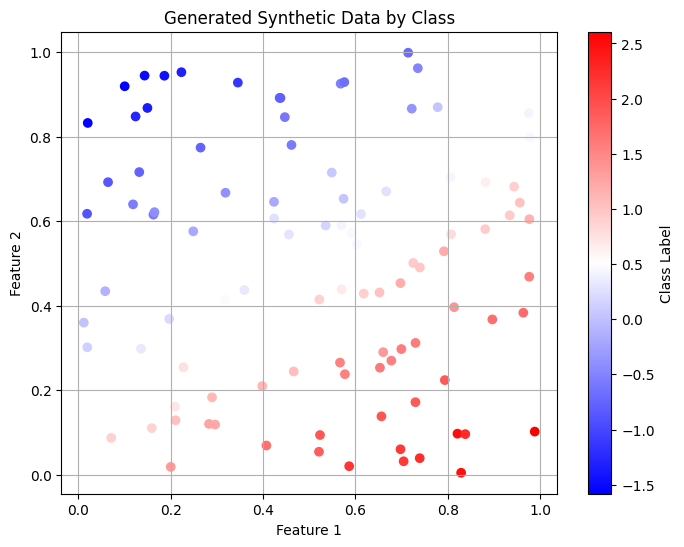

In [44]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_weights = np.array([[2.0], [-3.0]])
y = X @ true_weights + 1.0 + 0.1 * np.random.randn(100, 1)  # Linear target with noise

import matplotlib.pyplot as plt

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr') # Use 'c' for coloring by class and 'bwr' colormap
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Synthetic Data by Class") # Update title
plt.colorbar(label="Class Label") # Update colorbar label
plt.grid(True)
plt.show()


In [45]:
# Test your code
A1, b1, A2, b2 = train(X, y, input_size=2, hidden_size=5, output_size=1)
_, _, _, y_pred = forward(X, A1, b1, A2, b2)
print("Final predictions:\n", y_pred)

Epoch 0, Loss: 1.9809
Epoch 100, Loss: 1.5603
Epoch 200, Loss: 2.0486
Epoch 300, Loss: 2.1689
Epoch 400, Loss: 2.2003
Epoch 500, Loss: 2.2007
Epoch 600, Loss: 2.2021
Epoch 700, Loss: 2.2081
Epoch 800, Loss: 2.1999
Epoch 900, Loss: 2.2068
Final predictions:
 [[-0.10275727  0.56522607 -0.15010102 -0.794698    1.68625319  0.99014908
  -0.63659205  0.78074899 -1.33588085 -0.08361874  0.502638   -0.46851622
  -0.73091738 -1.37579622  0.83894331 -0.81998492  0.16878768 -0.84136012
   0.34325446  0.77721509  0.39402047  2.23504096  0.28263814  1.02738283
   0.53792906  0.8607424   2.42426876  0.92559552  1.63522767  1.28937353
   0.94720457  1.97508428  0.24020114  2.29486601  2.31454596  1.45529187
   1.05621688  2.33693626  1.24018436  1.27824277  0.37446003 -0.9569287
   1.43427669  1.86207853 -0.6306903  -0.42977767 -0.90506836  1.06368632
   2.16551956  2.50530831  1.62652562 -0.407272   -0.29908283  0.44989693
  -1.2733136  -0.668324    1.57818424  1.4509497   0.97721031  0.63618752
   

## Encapsulate the entire neural network logic into a class

So far, you have build up the logic of a simple neural network. But it's ugly: you have to deal with each parameter directly when using your model. Now let's write a python class to encapsulate the logic into a real model.

(This is a good habit in programming with python. Usually, jupyter notebook is only used for experiments with script codeing. A model is encapsulated by a python class, in a seperated `.py` file, then imported into a notebook.)

In [46]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize parameters
        self.lr = learning_rate
        # Xavier initialization for weights
        self.A1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.A2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        # Derivative of tanh(z) = 1 - tanh(z)^2
        return 1 - np.tanh(z) ** 2

    def mse_loss(self, y_pred, y_true):
        # Mean squared error loss
        return np.mean((y_pred - y_true) ** 2)

    def mse_derivative(self, y_pred, y_true):
        # Derivative of MSE with respect to y_pred
        return 2 * (y_pred - y_true) / y_true.size

    def forward(self, x):
        # First layer
        self.z1 = x @ self.A1 + self.b1    # shape: (batch_size, hidden_size)
        self.h1 = self.tanh(self.z1)       # activation, shape: (batch_size, hidden_size)
        # Second layer / output
        self.z2 = self.h1 @ self.A2 + self.b2  # shape: (batch_size, output_size)
        y_pred = self.z2  # Linear output
        return y_pred

    def backward(self, x, y):
        m = x.shape[0]  # batch size
        y_pred = self.z2  # In forward pass, so already computed

        # Gradients for output layer
        dL_dy_pred = self.mse_derivative(y_pred, y)  # (batch_size, output_size)
        dL_dA2 = self.h1.T @ dL_dy_pred              # (hidden_size, output_size)
        dL_db2 = np.sum(dL_dy_pred, axis=0, keepdims=True)  # (1, output_size)

        # Gradients for hidden layer
        dL_dh1 = dL_dy_pred @ self.A2.T           # (batch_size, hidden_size)
        dL_dz1 = dL_dh1 * self.tanh_derivative(self.z1)  # (batch_size, hidden_size)
        dL_dA1 = x.T @ dL_dz1                        # (input_size, hidden_size)
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)   # (1, hidden_size)

        # Update parameters
        self.A1 -= self.lr * dL_dA1
        self.b1 -= self.lr * dL_db1
        self.A2 -= self.lr * dL_dA2
        self.b2 -= self.lr * dL_db2

    def train(self, x, y, epochs=1000, lr=None, batch_size=None):
        if lr is not None:
            self.lr = lr
        # For true batch training (no mini-batch logic). Mini-batch can be added later.
        if batch_size is None:
            batch_size = x.shape[0]
        n = x.shape[0]
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = self.mse_loss(y_pred, y)
            self.backward(x, y)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, x):
        # The predict method is simply a forward with trained parameters.
        return self.forward(x)

### Test your encapsulated code with the generated data
We test the model only by convergence.

In [47]:
nn = SimpleNN(input_size=2, hidden_size=5, output_size=1)
nn.train(X, y, epochs=1000, lr=0.01, batch_size=16)

Epoch 0, Loss: 2.957363
Epoch 100, Loss: 0.443000
Epoch 200, Loss: 0.185020
Epoch 300, Loss: 0.112364
Epoch 400, Loss: 0.073846
Epoch 500, Loss: 0.049949
Epoch 600, Loss: 0.035377
Epoch 700, Loss: 0.026783
Epoch 800, Loss: 0.021843
Epoch 900, Loss: 0.019042


## Test your code with real data

Apply your model on real data, such as IRIS data: https://www.kaggle.com/datasets/uciml/iris